In [ ]:
pip uninstall qiskit qiskit-machine-learning -y


Found existing installation: qiskit 0.42.1
Uninstalling qiskit-0.42.1:
  Successfully uninstalled qiskit-0.42.1
Found existing installation: qiskit-machine-learning 0.6.1
Uninstalling qiskit-machine-learning-0.6.1:
  Successfully uninstalled qiskit-machine-learning-0.6.1


In [ ]:
pip install "qiskit==0.42.1" "qiskit-machine-learning==0.6.1" --no-cache-dir --force-reinstall

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 119.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 35.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.7/148.7 kB 137.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 109.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.5/241.5 kB 158.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 92.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 160.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 144.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.0/278.0 kB 142.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 141.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━

In this note, we want to try the same thing, i.e. a synthetically generated imbalanced data, and see the effect of using quantum kernels from the QISKIT library like the ZZ-feature map on them. We have already tested the classical kernel methods like the linear, Polynomial and the RBF kernel on this synthetic dataset.

https://qiskit-community.github.io/qiskit-machine-learning/tutorials/03_quantum_kernel.html

Before going into the kernel method, let us first try the following variational quantum classifier example given here for this dataset : https://github.com/qiskit-community/qiskit-machine-learning

In [ ]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from qiskit_machine_learning.algorithms import VQC
from qiskit.circuit.library import ZZFeatureMap, TwoLocal
from qiskit_machine_learning.optimizers import COBYLA
from qiskit_machine_learning.utils import algorithm_globals

# 1. Set global seed
seed = 1376
algorithm_globals.random_seed = seed

# 2. Create synthetic imbalanced dataset (90/10)
X, y = make_classification(
    n_samples=200,
    n_features=4,
    n_informative=3,
    n_redundant=0,
    weights=[0.90, 0.10],
    random_state=42
)

# 3. Reduce to 2 features for quantum encoding (or 3 max!)
X = X[:, :2]

# 4. Scale features to [0, π] (quantum circuits expect this range)
scaler = MinMaxScaler(feature_range=(0, np.pi))
X_scaled = scaler.fit_transform(X)

# 5. Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)

# 6. Build VQC (Variational Quantum Classifier)
feature_map = ZZFeatureMap(feature_dimension=2, reps=2, entanglement="linear")
ansatz = TwoLocal(2, ['ry', 'rz'], 'cz', reps=3)

vqc = VQC(feature_map=feature_map,ansatz=ansatz,optimizer=COBYLA(maxiter=100),) #inbuilt classical COBYLA optimizer

# 7. Train the model
vqc.fit(X_train, y_train)

# 8. Evaluate
score = vqc.score(X_test, y_test)
y_pred = vqc.predict(X_test)

print(f"\n VQC Testing Accuracy: {score:.2f}")
print("\n Classification Report:")
print(classification_report(y_test, y_pred))


ModuleNotFoundError: No module named 'qiskit_machine_learning.optimizers'

In [ ]:
!pip install pylatexenc

In [ ]:
from qiskit.circuit.library import ZZFeatureMap
from qiskit import QuantumCircuit

# Pick one input sample
sample = X_train[0]
print(f"Sample input: {sample}")

# Create feature map circuit for that sample
feature_map = ZZFeatureMap(feature_dimension=2, reps=2, entanglement='full')
circuit = feature_map.bind_parameters(sample)

# Draw the circuit in mpl style
circuit.draw(output='mpl')
plt.show()


Sample input: [0.68187685 1.21770314]


MissingOptionalLibraryError: "The 'pylatexenc' library is required to use 'MatplotlibDrawer'. You can install it with 'pip install pylatexenc'."

In [ ]:
from qiskit.utils import algorithm_globals
from qiskit.circuit.library import ZZFeatureMap
from qiskit.primitives import Sampler
from qiskit_machine_learning.kernels import FidelityQuantumKernel
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, roc_curve, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from qiskit.utils import QuantumInstance
from qiskit import Aer
from qiskit_machine_learning.kernels import FidelityQuantumKernel


 Classification Report (Quantum Kernel SVM):
              precision    recall  f1-score   support

           0       0.94      0.81      0.87        80
           1       0.52      0.80      0.63        20

    accuracy                           0.81       100
   macro avg       0.73      0.81      0.75       100
weighted avg       0.86      0.81      0.82       100



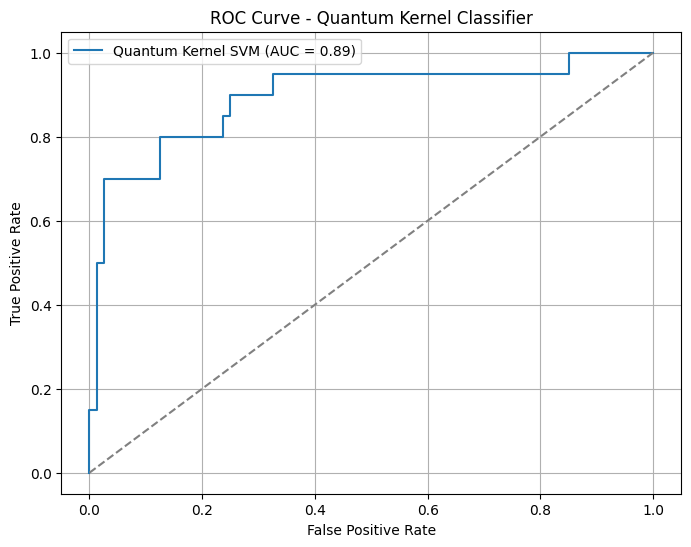

In [ ]:
# 1. Fix random seed
algorithm_globals.random_seed = 42

# 2. Generate small synthetic imbalanced dataset
X, y = make_classification(n_samples=500, n_features=2, n_informative=2, n_redundant=0, weights=[0.80, 0.20], random_state=42)

# 3. Normalize data for quantum encoding [0, π]
scaler = MinMaxScaler(feature_range=(0, np.pi))
X_scaled = scaler.fit_transform(X)

# 4. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)

# 5. Define quantum feature map
feature_map = ZZFeatureMap(feature_dimension=2, reps=2) #https://docs.quantum.ibm.com/api/qiskit/qiskit.circuit.library.ZZFeatureMap

# 6. Define quantum kernel with new Primitives interface
#sampler = Sampler() #some version problem, clash, as qiskit has a new version now
#quantum_kernel = FidelityQuantumKernel(feature_map=feature_map, sampler=sampler)

#backend = Aer.get_backend("aer_simulator_statevector")
#qi = QuantumInstance(backend, shots=1024, seed_simulator=42, seed_transpiler=42)

quantum_kernel = FidelityQuantumKernel(feature_map=feature_map)

#7. Compute kernel matrices

K_train = quantum_kernel.evaluate(X_train)
K_test = quantum_kernel.evaluate(X_test, X_train)

# 8. Train SVM with quantum kernel
qsvc = SVC(kernel="precomputed", class_weight="balanced", probability=True)
qsvc.fit(K_train, y_train)

# 9. Evaluate
y_pred = qsvc.predict(K_test)
y_proba = qsvc.predict_proba(K_test)[:, 1]

print("\n Classification Report (Quantum Kernel SVM):")
print(classification_report(y_test, y_pred))

# 10. Plot ROC
fpr, tpr, _ = roc_curve(y_test, y_proba)
auc_score = roc_auc_score(y_test, y_proba)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f"Quantum Kernel SVM (AUC = {auc_score:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Quantum Kernel Classifier")
plt.legend()
plt.grid(True)
plt.show()


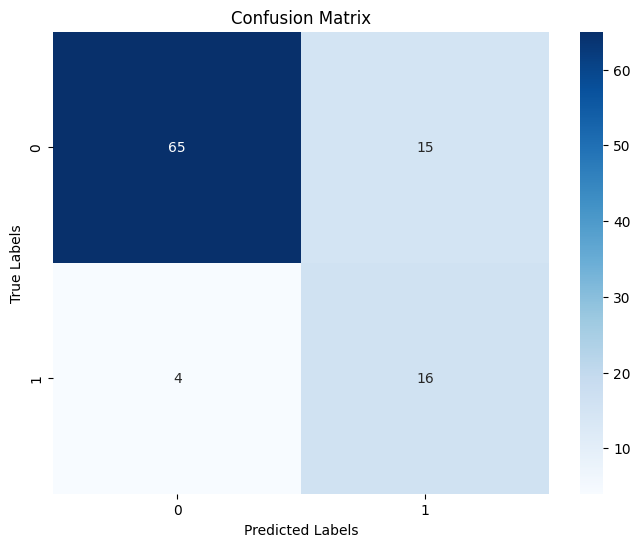

In [ ]:
plt.figure(figsize =(8,6))
cm = confusion_matrix(y_test, y_pred) #how often predicted labels match the true labels
sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Blues') #format annotation
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

Playing with Entanglement in the ZZ feature map :


 Classification Report (Quantum Kernel SVM):
              precision    recall  f1-score   support

           0       0.94      0.81      0.87        80
           1       0.52      0.80      0.63        20

    accuracy                           0.81       100
   macro avg       0.73      0.81      0.75       100
weighted avg       0.86      0.81      0.82       100



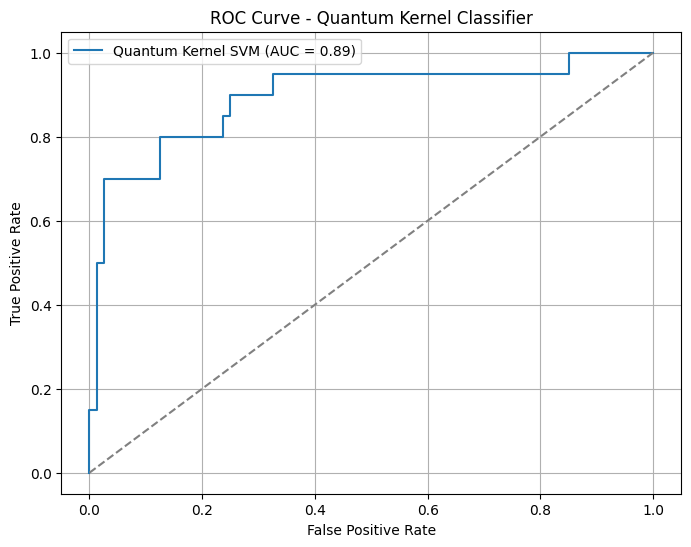

In [ ]:
# 1. Fix random seed
algorithm_globals.random_seed = 42

# 2. Generate small synthetic imbalanced dataset
X, y = make_classification(n_samples=500, n_features=2, n_informative=2, n_redundant=0, weights=[0.80, 0.20], random_state=42)

# 3. Normalize data for quantum encoding [0, π]
scaler = MinMaxScaler(feature_range=(0, np.pi))
X_scaled = scaler.fit_transform(X)

# 4. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)

# 5. Define quantum feature map
feature_map = ZZFeatureMap(feature_dimension=2, reps=2, entanglement="linear") #https://docs.quantum.ibm.com/api/qiskit/qiskit.circuit.library.ZZFeatureMap

# 6. Define quantum kernel with new Primitives interface
#sampler = Sampler() #some version problem, clash, as qiskit has a new version now
#quantum_kernel = FidelityQuantumKernel(feature_map=feature_map, sampler=sampler)

#backend = Aer.get_backend("aer_simulator_statevector")
#qi = QuantumInstance(backend, shots=1024, seed_simulator=42, seed_transpiler=42)

#adhoc_feature_map = ZZFeatureMap(feature_dimension=adhoc_dimension, reps=2, entanglement="linear")
#adhoc_kernel = FidelityQuantumKernel(fidelity=fidelity, feature_map=adhoc_feature_map)

quantum_kernel = FidelityQuantumKernel(feature_map=feature_map)

#7. Compute kernel matrices

K_train = quantum_kernel.evaluate(X_train)
K_test = quantum_kernel.evaluate(X_test, X_train)

# 8. Train SVM with quantum kernel
qsvc = SVC(kernel="precomputed", class_weight="balanced", probability=True)
qsvc.fit(K_train, y_train)

# 9. Evaluate
y_pred = qsvc.predict(K_test)
y_proba = qsvc.predict_proba(K_test)[:, 1]

print("\n Classification Report (Quantum Kernel SVM):")
print(classification_report(y_test, y_pred))

# 10. Plot ROC
fpr, tpr, _ = roc_curve(y_test, y_proba)
auc_score = roc_auc_score(y_test, y_proba)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f"Quantum Kernel SVM (AUC = {auc_score:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Quantum Kernel Classifier")
plt.legend()
plt.grid(True)
plt.show()


This is ofcourse much slower, that random forest or XG boost I think. ALso this is a synthetic dataset, have to run this on the real dataset


 Evaluating imbalance: 0.95 / 0.05

 Evaluating imbalance: 0.90 / 0.10

 Evaluating imbalance: 0.85 / 0.15

 Evaluating imbalance: 0.80 / 0.20


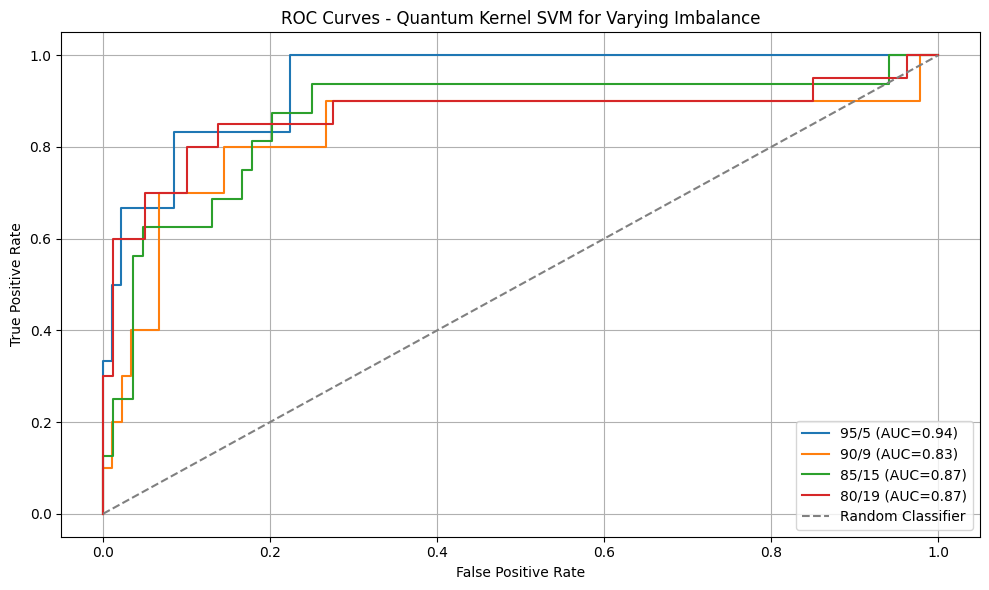

In [ ]:
# 1. Fix seed
algorithm_globals.random_seed = 42

# 2. Define different class imbalance scenarios
imbalance_levels = [0.95, 0.90, 0.85, 0.80]

plt.figure(figsize=(10, 6))

for imbalance in imbalance_levels:
    print(f"\n Evaluating imbalance: {imbalance:.2f} / {1 - imbalance:.2f}")

    # Generate synthetic dataset with imbalance
    X, y = make_classification(
        n_samples=500,
        n_features=2,
        n_informative=2,
        n_redundant=0,
        weights=[imbalance, 1 - imbalance],
        random_state=42
    )

    # Normalize features
    scaler = MinMaxScaler(feature_range=(0, np.pi))
    X_scaled = scaler.fit_transform(X)

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42
    )

    # Feature map and quantum kernel
    feature_map = ZZFeatureMap(feature_dimension=2, reps=2)
    quantum_kernel = FidelityQuantumKernel(feature_map=feature_map)

    # Evaluate kernel matrix
    K_train = quantum_kernel.evaluate(X_train)
    K_test = quantum_kernel.evaluate(X_test, X_train)

    # Train SVM
    qsvc = SVC(kernel="precomputed", class_weight="balanced", probability=True)
    qsvc.fit(K_train, y_train)

    # Predictions
    y_proba = qsvc.predict_proba(K_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    auc_score = roc_auc_score(y_test, y_proba)

    plt.plot(fpr, tpr, label=f"{int(imbalance*100)}/{int((1-imbalance)*100)} (AUC={auc_score:.2f})")

plt.plot([0, 1], [0, 1], linestyle="--", color="gray", label="Random Classifier")
plt.title("ROC Curves - Quantum Kernel SVM for Varying Imbalance")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
